## Importar Librerías Necesarias

In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris, load_wine
from sklearn.model_selection import train_test_split

## Importar Clase RNA

In [2]:
from src.neural_network import RNA

## Definición de Función Personalizada para Dividir Dataset

In [3]:
def train_test_grouped(data:pd.core.frame.DataFrame,
                       target_group:str, 
                       test_size:float, 
                       rs=42): ## -> (pd.core.frame.DataFrame, pd.core.frame.DataFrame):
    
    groups = data.groupby(target_group) #Dividir el DataFrame por los valores de la columna objetivo

    ##Dividir cada grupo aleatoriamente en dos conjuntos
    train_sets = []
    test_sets = []
    for _, group in groups:
        train, test = train_test_split(group, test_size=test_size, random_state=rs) #######RANDOM STATE#######
        train_sets.append(train)
        test_sets.append(test)

    ##Unir los conjuntos de entrenamiento y validación
    train_df = pd.concat(train_sets)
    test_df = pd.concat(test_sets)


    return train_df, test_df

## Cargar Datos

In [4]:
#iris = load_iris()
#target = 'species'
#data = pd.DataFrame(iris['data'], columns=iris['feature_names'])
#data[target] = iris['target']
#data = data[data[target] != 2]
#names = iris.target_names[0:-1]
#print(names)

In [4]:
wine = load_wine()
target = 'color'
data = pd.DataFrame(wine['data'], columns=wine['feature_names'])
data[target] = wine['target']
target_names = wine.target_names
print(target_names)

['class_0' 'class_1' 'class_2']


### Dividir el Dataset

In [5]:
train_df, test_df = train_test_grouped(data, target, 0.15)

In [6]:
scaler = MinMaxScaler() #Definir estandarizador de datos

        Entrenamiento

In [7]:
train_features = train_df.drop(target, axis=1)
train_labels = train_df[target]

In [8]:
train_features = np.array(train_features)
train_labels = np.array(train_labels)
train_labels = train_labels.reshape(train_labels.shape[0], 1)

In [9]:
train_features = scaler.fit_transform(train_features)
train_labels = scaler.fit_transform(train_labels)

        Validación

In [10]:
test_features = test_df.drop(target, axis=1)
test_labels = test_df[target]

In [11]:
test_features = np.array(test_features)
test_labels = np.array(test_labels)
test_labels = test_labels.reshape(test_labels.shape[0], 1)

In [12]:
test_features = scaler.fit_transform(test_features)
test_labels = scaler.fit_transform(test_labels)

                        Verificar que el dataset se haya dividido correctamente

In [13]:
if train_features.shape[1] != test_features.shape[1]:
    raise Warning("Los datasets de entrenamiento y validación no poseen la misma cantidad de entradas")

if train_labels.shape[1] != test_labels.shape[1]:
    raise Warning("Los datasets de entrenamiento y validación no poseen la misma cantidad de salidas")

## Definir RNA

In [14]:
inp = train_features.shape[1]
hidden = 4
out = train_labels.shape[1]

RED = RNA(input_size=inp, hidden_size=hidden, output_size=out)

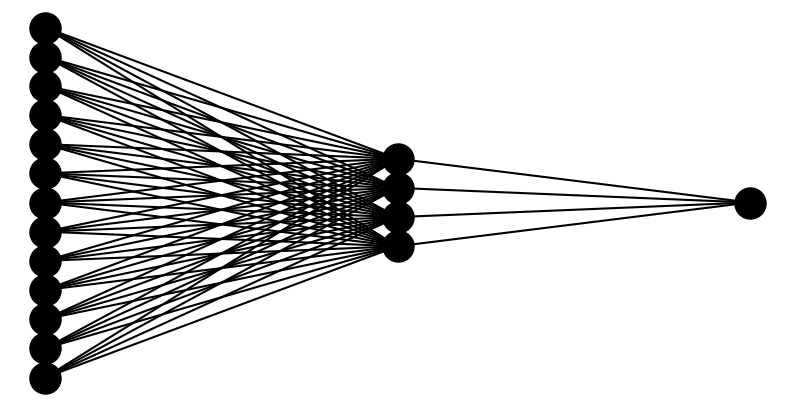

In [15]:
RED.graph_neural_network()

### Entrenar RNA

ECM =  0.2497502166938466


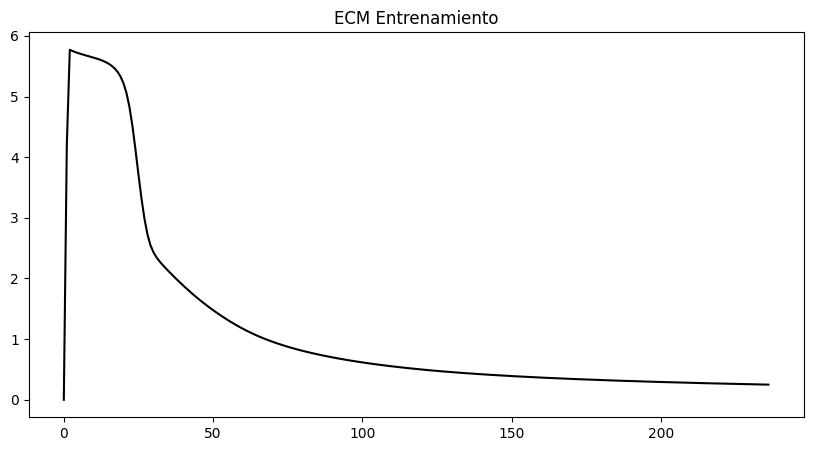

In [16]:
Y_T, w, c = RED.fit(train_features, train_labels, hidden=hidden, alpha=0.6, iterations=1000, ECM_stop=0.25)

In [17]:
train_score = RED.accuracy(train_labels, Y_T, scaler=scaler)
train_score

0.9933333333333333

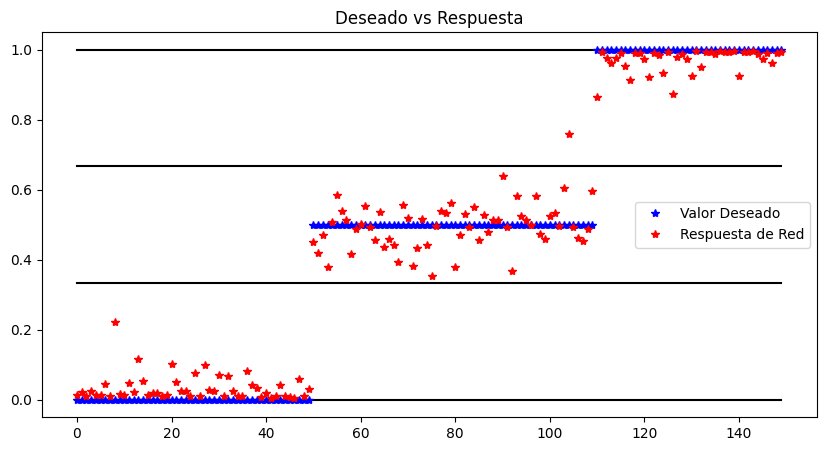

In [18]:
RED.graph_results(train_labels, Y_T)

### Validar RNA

In [20]:
####filas, columnas = test_features.shape
####indice_aleatorio = np.random.permutation(filas)

####arr_F = test_features[indice_aleatorio, :]
####arr_L = test_labels[indice_aleatorio, :]

In [19]:
Y_V = RED.predict(test_features, w=w, c=c)

In [20]:
test_score = RED.accuracy(test_labels, Y_V, scaler=scaler)
test_score

0.9642857142857143

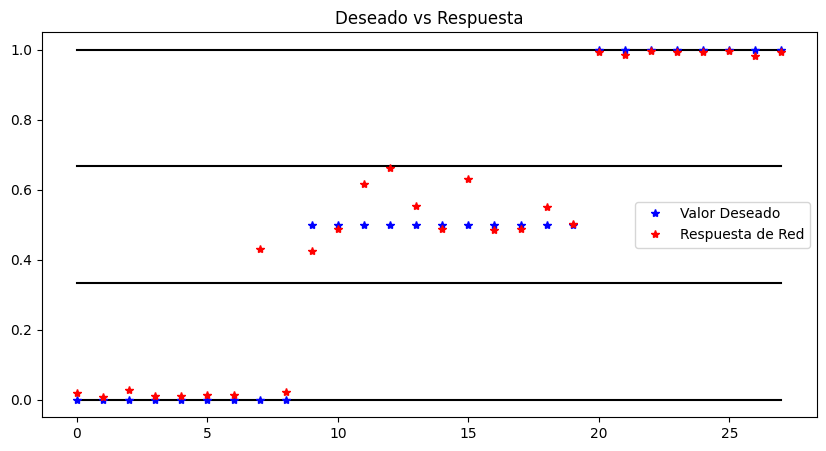

In [21]:
RED.graph_results(test_labels, Y_V)

In [22]:
tabla = RED.probas(test_labels, Y_V, names=target_names)
tabla

,Clasificación Red,Probabilidad,Clasificación Real
0,class_0,0.981519,class_0
1,class_0,0.992820,class_0
2,class_0,0.971433,class_0
3,class_0,0.989097,class_0
4,class_0,0.988589,class_0
5,class_0,0.987320,class_0
6,class_0,0.987767,class_0
7,class_1,0.932116,class_0
8,class_0,0.976525,class_0
9,class_1,0.924480,class_1
